#### [PREV](2.OOP_Multi_Feature_Linear_Regression.ipynb) | [HOME](../README.md) | [NEXT](4.OOP_Logistic_Regression.ipynb)

---

# OOP Polynomial Linear Regression Implementation

This Jupyter Notebook provides a basic implementation of Polynomial Linear Regression. The data set contains measurements on a single species of insect captured on two continents. We want to predict an insects wing size given the other measurements we have.

#### Step 1 - Import Dependencies

In [10]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error,mean_squared_error 

#### Step 2 - Import And Visualise The Data

In [11]:
#Import data as a Pandas DataFrame
insects = pd.read_csv('./data/insects.csv', sep='\t')
insects = pd.DataFrame({
    'continent': insects['continent'],
    'latitude': insects['latitude'],
    'sex': insects['sex'],
    'wingsize': insects['wingsize']
})

# Features variable
X_insects = insects[['continent', 'latitude', 'sex']]
# Target variable
y_insects = insects['wingsize']

insects.head()

,continent,latitude,sex,wingsize
0,1,35.5,0,901
1,1,37.0,0,896
2,1,38.6,0,906
3,1,40.7,0,907
4,1,40.9,0,898


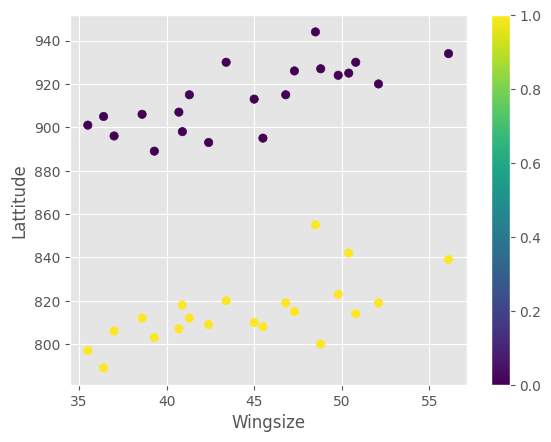

In [12]:
# Plot the data, colour coded by sex
ax = plt.scatter(insects.latitude, insects.wingsize, c=insects['sex'])
plt.xlabel("Wingsize")
plt.ylabel("Lattitude")
plt.colorbar()
plt.show()

#### Step 3: Instantiate a LinearRegression Object

In [13]:
insects_regression = LinearRegression()

#### Step 4: Fit the model

In [14]:
# Instantiate a polynomial feature with 4 degrees
poly = PolynomialFeatures(degree=3, include_bias=False)

# Fit and transform the features
poly_features = poly.fit_transform(X_insects)

# Fit the regression model
insects_regression.fit(poly_features, y_insects)

LinearRegression()

#### Step 5: Predict Values

In [15]:
# Predict the target for the whole dataset
wing_size_predictions = insects_regression.predict(poly_features)

#Predict the target for a new data point
new_insect = pd.DataFrame({
    'continent': [1],
    'latitude': [40],
    'sex': [0]
})
new_poly_features = poly.fit_transform(new_insect)
new_insect['wingsize'] = insects_regression.predict(new_poly_features)
print(f"New insect is:\n{new_insect}")

New insect is:
   continent  latitude  sex    wingsize
0          1        40    0  901.420286


#### Step 5: Plot the Predictions

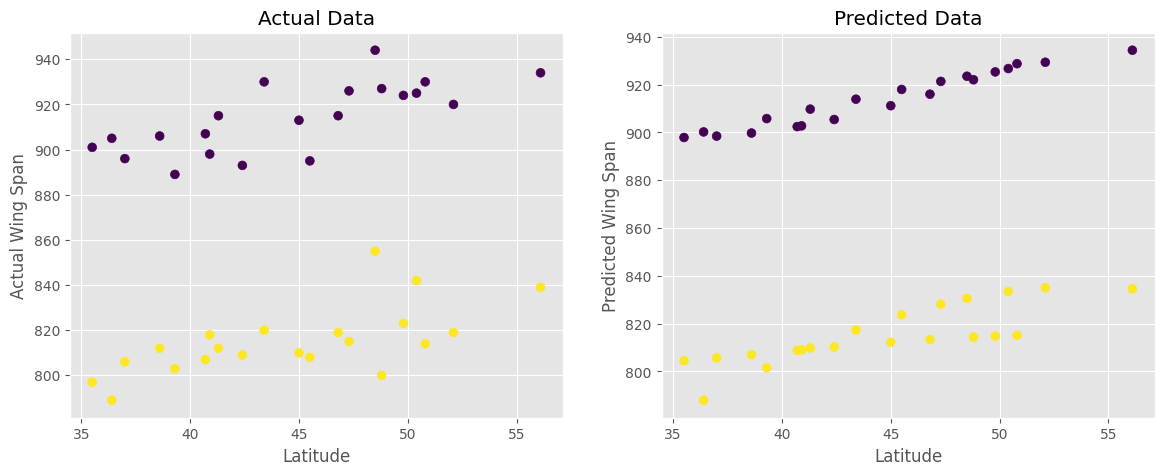

In [16]:
#Plot the predictions compared to the actual data
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].scatter(insects.latitude, insects.wingsize, c=insects['sex'],  s=40)
axs[0].set_title("Actual Data")
axs[0].set_xlabel("Latitude")
axs[0].set_ylabel("Actual Wing Span")


axs[1].scatter(insects.latitude, wing_size_predictions, c=insects['sex'], s=40)
axs[1].set_title("Predicted Data")
axs[1].set_xlabel("Latitude")
axs[1].set_ylabel("Predicted Wing Span")

plt.show()

#### Step 6: Evaluate The Model

In [17]:
#Get Evalutative Data from the model
print(f"Model coefficient :{insects_regression.coef_}")
print(f"Model y intercept :{insects_regression.intercept_}")

mae = mean_absolute_error(y_true=y_insects,y_pred=wing_size_predictions) 
mse = mean_squared_error(y_true=y_insects,y_pred=wing_size_predictions)
print("MAE:",mae) 
print("MSE:",mse) 

Model coefficient :[ 6.85375179e+01 -5.77316156e+00 -1.31499371e+02  6.85375179e+01
 -4.98263720e+00  3.97438433e+01  1.87148032e-01  6.18802966e+00
 -1.31499371e+02  6.85375179e+01 -4.98263720e+00  3.97438433e+01
  1.17030293e-01 -2.74484309e+00  3.97438433e+01 -1.50485074e-03
 -1.26983489e-01  6.18802966e+00 -1.31499371e+02]
Model y intercept :934.9702980382305
MAE: 6.9614652849110685
MSE: 90.38885303155045


In [18]:
#Optional: Manually Evaluate the loss and cost of the model
model_loss = pd.DataFrame({
    'Target': y_insects,
    'Predicted result': wing_size_predictions,
    'Loss': abs(insects_regression.predict(poly_features).round(2) - y_insects)**2
})
model_cost = 1 / (2 * model_loss.shape[0]) * model_loss['Loss'].sum()

print(f"The cost of this model is {model_cost:.5f}")
print(model_loss)

The cost of this model is 45.19435
    Target  Predicted result      Loss
0      901        897.883780    9.7344
1      896        898.455644    6.0516
2      906        899.745099   39.0625
3      907        902.441115   20.7936
4      898        902.754594   22.5625
5      893        905.405509  154.0081
6      913        911.184818    3.3124
7      915        915.995519    1.0000
8      927        922.044474   24.6016
9      924        925.325071    1.7689
10     930        928.764375    1.5376
11     905        900.214113   22.9441
12     889        905.791195  281.9041
13     915        909.746046   27.5625
14     930        913.903346  259.2100
15     895        917.983175  528.0804
16     926        921.355127   21.5296
17     944        923.511340  419.8401
18     925        926.731793    2.9929
19     920        929.367933   87.7969
20     934        934.395931    0.1600
21     797        804.494431   56.1001
22     806        805.703664    0.0900
23     812        807.043143 